<a href="https://colab.research.google.com/github/shubhamsks/deep-learning/blob/master/conv_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = './udacity_sdc.png'
bgr_img = cv2.imread(img_path)

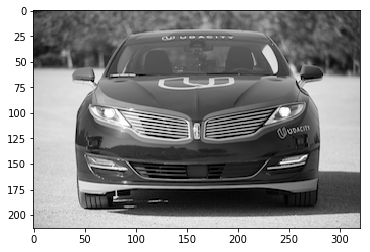

In [9]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype('float32')/255
plt.imshow(gray_img, cmap = 'gray')
plt.show()

In [10]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [11]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3= filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1, filter_2, filter_3, filter_4])
print(filters.shape)

(4, 4, 4)


In [12]:
print(filters)

[[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]


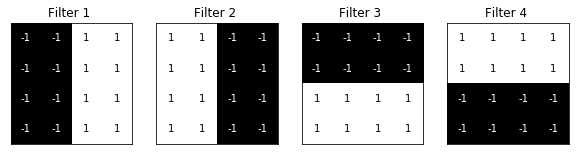

In [15]:
fig = plt.figure(figsize = (10,5))
for i in range(4):
  ax = fig.add_subplot(1, 4, i + 1, xticks = [], yticks = [])
  ax.imshow(filters[i], cmap='gray')
  ax.set_title('Filter {} '.format(i + 1))
  width, height = filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]), xy = (y,x),
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 color = 'white' if filters[i][x][y] < 0 else 'black')

**Udacit Code**

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self, weight):
    super(Net, self).__init__()
    k_height, k_width = weight.shape[2:]
    # assumes there are 4 grayscale filters
    self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
    

  def forward(self, x):
      # calculates the output of a convolutional layer
      # pre- and post-activation
      conv_x = self.conv(x)
      activated_x = F.relu(conv_x)

      # returns both layers
      return conv_x, activated_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)


Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [0]:

# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

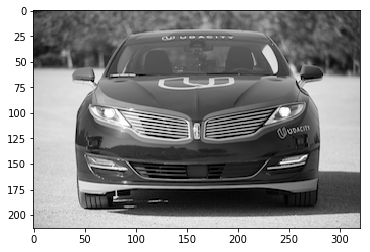

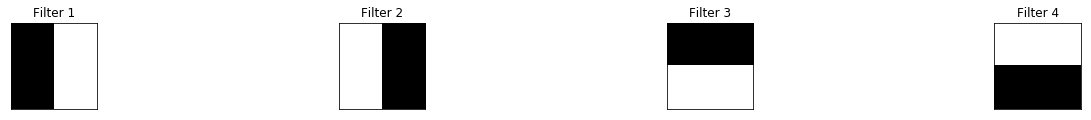

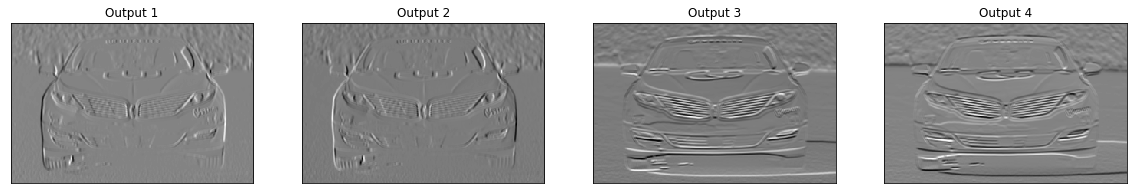

In [18]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

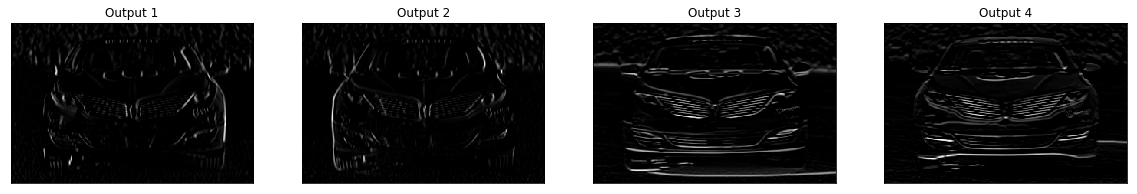

In [19]:

# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)


# Convulation Layers in Keras
from keras.layer import Conv2D


```

Conv2D(filters, kernel_size,strides, padding, activation = 'relu',input_shape)**bold text**
```



 here we have provided input_shape which has to be given only if its input layer or in other word if its first layer
 padding argument decides what to do if stride goes out of bound 'valid' or 'same' default is 'valid' means remove
those extra layer and same mean add extra with 0's 

# Example #1
Say I'm constructing a CNN, and my input layer accepts grayscale images that are 200 by 200 pixels (corresponding to a 3D array with height 200, width 200, and depth 1). Then, say I'd like the next layer to be a convolutional layer with 16 filters, each with a width and height of 2. When performing the convolution, I'd like the filter to jump two pixels at a time. I also don't want the filter to extend outside of the image boundaries; in other words, I don't want to pad the image with zeros. Then, to construct this convolutional layer, I would use the following line of code:


```
Conv2D(filters=16, kernel_size=2, strides=2, activation='relu', input_shape=(200, 200, 1))
```

# Example #2
Say I'd like the next layer in my CNN to be a convolutional layer that takes the layer constructed in Example 1 as input. Say I'd like my new layer to have 32 filters, each with a height and width of 3. When performing the convolution, I'd like the filter to jump 1 pixel at a time. I want the convolutional layer to see all regions of the previous layer, and so I don't mind if the filter hangs over the edge of the previous layer when it's performing the convolution. Then, to construct this convolutional layer, I would use the following line of code:


```
Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')
```


# Example #3
If you look up code online, it is also common to see convolutional layers in Keras in this format:


```

Conv2D(64, (2,2), activation='relu')
```





In [26]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', 
    activation='relu', input_shape=(128, 128, 3)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Formula: Number of Parameters in a Convolutional Layer
The number of parameters in a convolutional layer depends on the supplied values of filters, kernel_size, and input_shape. Let's define a few variables:

K - the number of filters in the convolutional layer

F - the height and width of the convolutional filters

D_in - the depth of the previous layer

Notice that K = filters, and F = kernel_size. Likewise, D_in is the last value in the input_shape tuple.


Since there are F*F*D_in weights per filter, and the convolutional layer is composed of K filters, the total number of weights in the convolutional layer is K*F*F*D_in. Since there is one bias term per filter, the convolutional layer has K biases. Thus, the _ number of parameters_ in the convolutional layer is given by K*F*F*D_in + K.

# Formula: Shape of a Convolutional Layer
The shape of a convolutional layer depends on the supplied values of kernel_size, input_shape, padding, and stride. Let's define a few variables:

K - the number of filters in the convolutional layer

F - the height and width of the convolutional filters

S - the stride of the convolution

H_in - the height of the previous layer

W_in - the width of the previous layer

Notice that K = filters, F = kernel_size, and S = stride. Likewise, H_in and W_in are the first and second value of the input_shape tuple, respectively.


The depth of the convolutional layer will always equal the number of filters K.


If padding = 'same', then the spatial dimensions of the convolutional layer are the following:


height = ceil(float(H_in) / float(S))

width = ceil(float(W_in) / float(S))

If padding = 'valid', then the spatial dimensions of the convolutional layer are the following:


height = ceil(float(H_in - F + 1) / float(S))

width = ceil(float(W_in - F + 1) / float(S))


In [30]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
